In [152]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os

In [153]:
gpus  = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [154]:
# remove sketchy images, wrong file types, or anything that may ruin the data
import cv2
import imghdr

In [155]:
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [156]:
os.listdir(data_dir)

['dogs', 'people']

In [157]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

poster.jpg
image20.jpeg
images.jpg
images43.jpg
GettyImages-1316660523-e1624547752835.jpg
National-Dog-Day--960x640.jpg
image26.jpeg
images4.jpg
images9.jpg
images62.jpg
images7.jpg
images11.jpg
smallest-dog-breeds-toy-poodle.jpg
KOA_Nassau_2697x1517.jpg
1655430860853.jpeg
images52.jpg
golden-retriever-puppy.jpg
images44.jpg
images5.jpg
image19.jpeg
images27.jpg
images17.jpg
images84.jpg
gettyimages-917452888-edit_custom-c656c35e4e40bf22799195af846379af6538810c-s1100-c50.jpg
61638305-a79f-43db-a667-00fcba690204.jpeg
domestic-dog_thumb_3x2.jpg
images10.jpg
dog-nose-istock-uc-santa-barbara-small_0.jpg
small-dog-owners-1.jpg
image30.jpeg
images69.jpg
images33.jpg
image21.jpeg
images58.jpg
Science-Life-Extension-Drug-for-Big-Dogs-Is-Getting-Closer-1330545769.jpg
WhatsApp_Image_2021-11-24_at_4.13.42_PM_1024x1024.jpg
image14.jpeg
WI110122_FF_ForeverDogs_2400x1350_crop.jpg
domestic-dog_thumb_3x4.jpg
images53.jpg
image6.jpeg
Untitled_design_-_2023-06-20T145027.117.png
image11.jpeg
images13.jpg

In [158]:
img = cv2.imread(os.path.join('data', 'people', 'images.jpg'))
img.shape

(168, 300, 3)

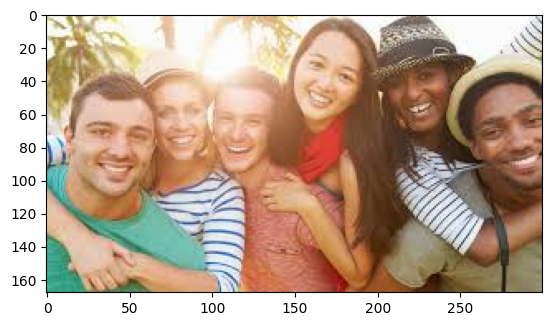

In [159]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [160]:
# remove dodgy images, before this I also manually removed anything smaller than 10kb
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [161]:
import numpy as np

In [162]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 341 files belonging to 2 classes.


In [163]:
data_iterator = data.as_numpy_iterator()

In [164]:
batch = data_iterator.next()

In [165]:
batch

(array([[[[ 66.       ,  78.       ,  40.       ],
          [ 69.       ,  81.       ,  43.       ],
          [ 70.       ,  82.       ,  44.       ],
          ...,
          [222.91882  , 203.64539  , 176.88757  ],
          [229.9513   , 209.9513   , 182.9513   ],
          [227.57751  , 207.57751  , 180.57751  ]],
 
         [[ 66.       ,  78.       ,  40.       ],
          [ 69.       ,  81.       ,  43.       ],
          [ 70.       ,  82.       ,  44.       ],
          ...,
          [215.58862  , 195.58862  , 168.58862  ],
          [223.81482  , 203.81482  , 176.81482  ],
          [225.32031  , 205.32031  , 178.32031  ]],
 
         [[ 66.354614 ,  78.354614 ,  40.354614 ],
          [ 69.       ,  81.       ,  43.       ],
          [ 68.90625  ,  80.90625  ,  42.90625  ],
          ...,
          [215.57886  , 195.57886  , 168.57886  ],
          [215.07434  , 195.07434  , 168.07434  ],
          [222.41919  , 202.41919  , 175.41919  ]],
 
         ...,
 
         [[1

In [166]:
batch[0].shape

(32, 256, 256, 3)

In [167]:
# CLASS 1 IS PEOPLE 0 IS DOG
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

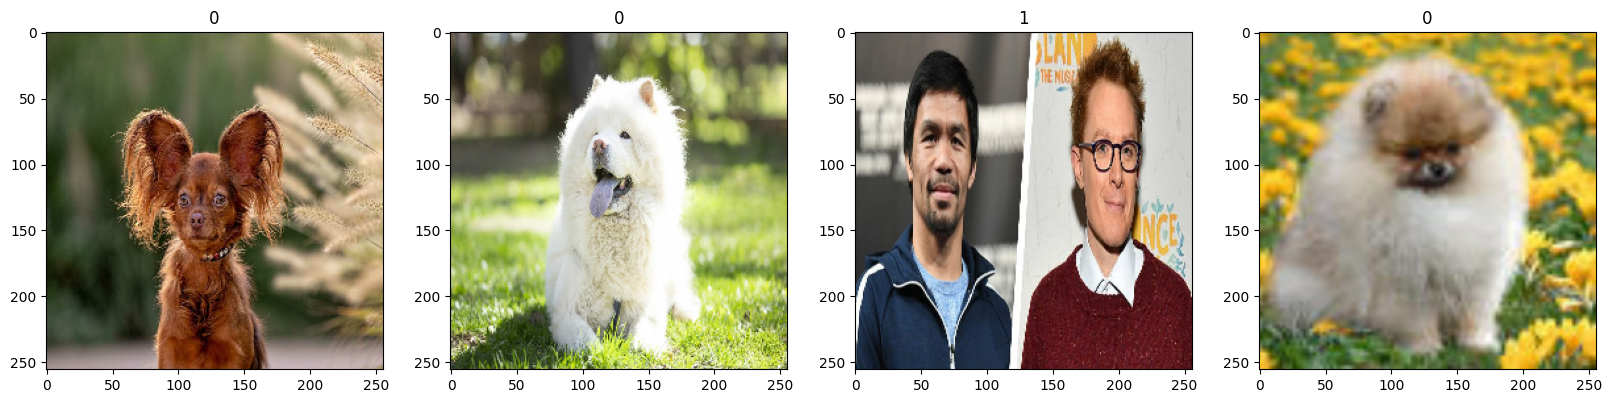

In [168]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [169]:
scaled = batch[0] / 255
scaled.max()

1.0

In [170]:
data = data.map(lambda x,y: (x / 255,y))

In [171]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          ...,
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ]],
 
         [[0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          ...,
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ]],
 
         [[0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          ...,
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ],
          [0.99607843, 0.9764706 , 0.9647059 ]],
 
         ...,
 
         [[0.73784465, 0.5813266 , 0.37740502],
          [0.78991

In [172]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [173]:
train_size

7

In [174]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [175]:
# LEARNING USING A NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [176]:
model = Sequential()

In [177]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [178]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [179]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 834ms/step - loss: 0.8533 - accuracy: 0.5223 - val_loss: 0.6661 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 7s 797ms/step - loss: 0.6544 - accuracy: 0.4821 - val_loss: 0.6009 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 7s 820ms/step - loss: 0.6168 - accuracy: 0.7321 - val_loss: 0.5658 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 7s 815ms/step - loss: 0.5446 - accuracy: 0.7723 - val_loss: 0.4748 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 7s 880ms/step - loss: 0.5463 - accuracy: 0.7411 - val_loss: 0.5351 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 7s 811ms/step - loss: 0.4819 - accuracy: 0.7857 - val_loss: 0.4362 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 7s 818ms/step - loss: 0.4780 - accuracy: 0.7857 - val_loss: 0.3471 - val_accuracy: 0.9375
Epoch 8/20
7/7 [====

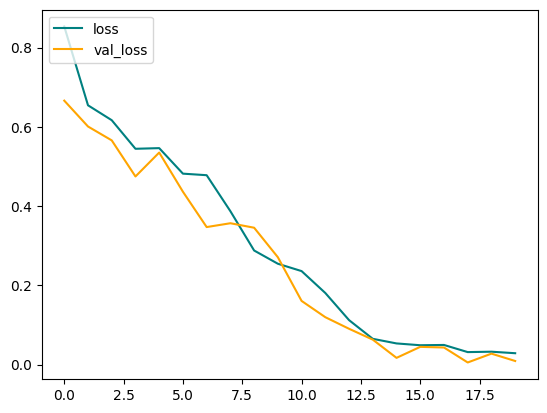

In [180]:
# performancefig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

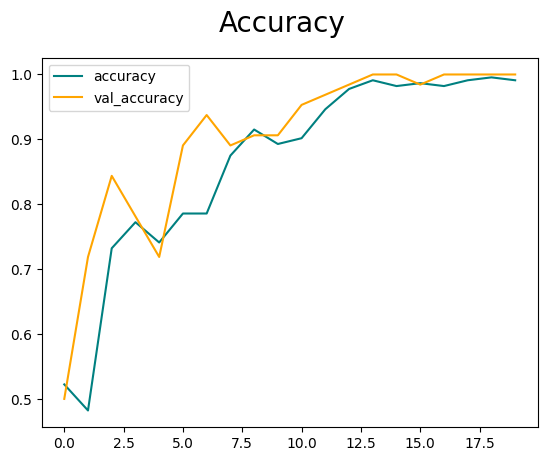

In [181]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [182]:
# evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [183]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [184]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 170ms/step


In [185]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9230769, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [186]:
# now lets test!
import cv2

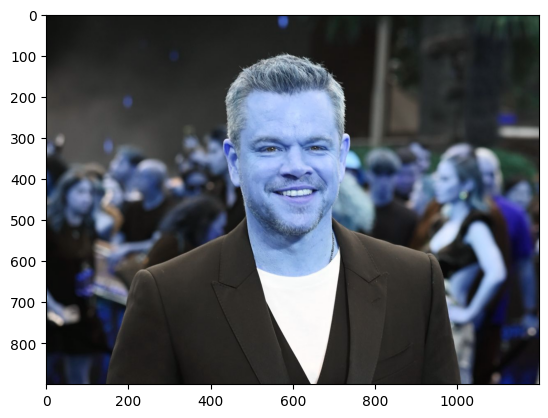

In [187]:
# open cv reads in BGR, thats why the color is weird
img = cv2.imread('mattdamon.jpg')
plt.imshow(img)
plt.show()

In [188]:
# need to fix in order to pass through network
resize = tf.image.resize(img, (256,256))

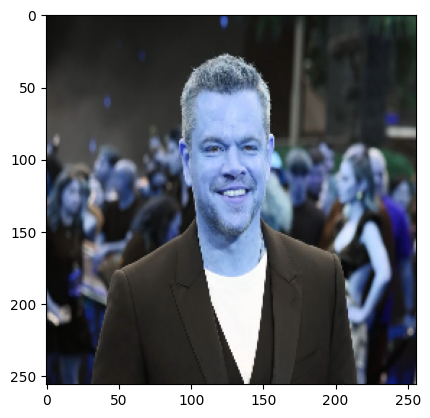

In [189]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [190]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


In [191]:
yhat

array([[0.6255586]], dtype=float32)

In [192]:
# CLASS 1 IS PEOPLE 0 IS DOG
if yhat > 0.5: 
    print(f'This image is of class Person')
else:
    print(f'This image is of class Dog')

This image is of class Person


In [193]:
# TESTING RESULTS:
# CLASSIFIES MATT DAMON PICTURE AS 'PERSON'
# CLASSIFIES GOLDEN RETRIEVER AS 'DOG'